In [50]:
import pandas as pd
import numpy as np
import data_browsing
from tqdm.notebook import tqdm

This is a guide to the data_browsing and cluster_testing scripts.

The main data we have is called "pairs_counts.csv"

# Data Browsing

In [6]:
pairs_counts = pd.read_csv("pairs_counts.csv", index_col= 0)

C:\Users\Anthony\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
pairs_counts.head(10)

,aspects,opinions,samples
0,service,great,153103
1,food,great,140756
2,food,good,127177
3,place,great,76266
4,service,good,68191
5,food,delicious,64893
6,food,amazing,60859
7,service,excellent,56057
8,staff,friendly,51254
9,place,love,39988


We have a function that returns a dictionary that gives just the aspects, opinions by themselves and their proportions.

You can set different thresholds if you want only a certain number of samples.

In [13]:
baseline = data_browsing.get_baseline_proportions(pairs_counts, threshold = 250)

In [16]:
baseline['opinions'].head(20)

,word,samples,proportion
86785,great,962759,0.081549
84100,good,648601,0.054939
33022,amazing,337746,0.028608
40746,best,275076,0.023300
59601,delicious,259696,0.021997
123411,nice,235085,0.019912
69927,excellent,202796,0.017177
110983,love,172823,0.014639
37393,awesome,165309,0.014002
68368,enjoyed,130697,0.011070


In [17]:
baseline['aspects'].head(20)

,word,samples,proportion
122880,food,1127427,0.095497
211107,service,876747,0.074263
183262,place,609055,0.051589
226097,staff,261584,0.022157
190595,prices,246428,0.020873
197375,restaurant,189956,0.016090
209284,server,150768,0.012771
116232,experience,149394,0.012654
57014,atmosphere,128657,0.010898
160235,meal,125952,0.010669


We can get the aspects/opinions dataframe associated with a certain word. For example, we will see the opinions people are using to talk about ambiance

In [20]:
ambiance_counts = data_browsing.get_counts_for_word('ambiance', pairs_counts, wordtype= 'aspects')

In [22]:
ambiance_counts.head(10)

,opinions,samples
102,great,6818
146,nice,5139
503,love,1751
625,good,1430
954,beautiful,962
1002,amazing,912
1066,very nice,861
1077,perfect,855
1111,cool,832
1385,enjoyed,679


The goal here is to compare the proportions of these samples with the baseline. If $p_a(w)$ is the proportion of the opinions that are $w$ in the ambiance dataframe, and $p(w)$ is the proportion of $w$ in the baseline, then the "change" score is $\frac{p_a(w) - p(w)}{p(w)}$. We find this by calling a function:

In [24]:
# here the threshold is the number of times it must be mentioned in the ambiance df

ambiance_scores = data_browsing.get_pct_change_df(ambiance_counts, baseline['opinions'], threshold = 50)

In [25]:
ambiance_scores.head(10)

,word,samples,proportion,baseline_prop,change
47,very romantic,112,0.002599,0.000065,39.111591
18,romantic,302,0.007008,0.000205,33.204589
48,hip,104,0.002413,0.000095,24.395325
72,chic,66,0.001532,0.000071,20.501128
85,4 stars,56,0.001300,0.000064,19.402505
17,casual,332,0.007705,0.000392,18.633109
19,classy,266,0.006173,0.000325,18.008280
86,sophisticated,54,0.001253,0.000067,17.680215
29,chilled,177,0.004108,0.000230,16.828617
13,relaxing,464,0.010768,0.000619,16.383439


This whole process could be done in one function.

In [28]:
words = ['ambiance', 'ambience', 'vibe']

In [30]:
output_dictionary = data_browsing.get_pct_change_for_words(pairs_counts,
                                       words, wordtype= 'aspects', threshold = 50, baseline_threshold= 500)

In [31]:
output_dictionary['ambiance'].head(5)

,word,samples,proportion,baseline_prop,change
47,very romantic,112,0.002599,0.000065,39.111591
18,romantic,302,0.007008,0.000205,33.204589
48,hip,104,0.002413,0.000095,24.395325
72,chic,66,0.001532,0.000071,20.501128
85,4 stars,56,0.001300,0.000064,19.402505


In [32]:
output_dictionary['ambience'].head(5)

,word,samples,proportion,baseline_prop,change
17,romantic,128,0.006998,0.000205,33.151736
13,casual,204,0.011152,0.000392,27.418853
32,,65,0.003553,0.000136,25.138280
38,very relaxing,62,0.003389,0.000147,22.117097
14,relaxing,190,0.010387,0.000619,15.768596


In [33]:
output_dictionary['vibe'].head(5)

,word,samples,proportion,baseline_prop,change
16,very chill,85,0.006710,0.000063,105.187138
10,chilled,157,0.012393,0.000230,52.792604
14,upbeat,99,0.007815,0.000162,47.128785
9,very cool,183,0.014446,0.000340,41.498514
19,old school,82,0.006473,0.000155,40.828002


We also have an add_dfs function, which can take a list of dataframes and aggregate their results.

In [34]:
df1 = data_browsing.get_counts_for_word('ambiance', pairs_counts, wordtype= 'aspects')

In [35]:
df2 = data_browsing.get_counts_for_word('ambience', pairs_counts, wordtype= 'aspects')

In [36]:
df3 = data_browsing.get_counts_for_word('vibe', pairs_counts, wordtype= 'aspects')

In [38]:
data_browsing.add_dfs([df1, df2, df3]).head(10)

,word,samples
1116,great,11541
1629,nice,8044
1084,good,3471
1457,love,2780
638,cool,1971
357,amazing,1566
420,beautiful,1351
2023,perfect,1312
3376,very nice,1285
402,awesome,1141


# Cluster Testing

In [39]:
top_aspects = baseline['aspects']['word'].iloc[:100].values

In [40]:
print(top_aspects)

['food' 'service' 'place' 'staff' 'prices' 'restaurant' 'server'
 'experience' 'atmosphere' 'meal' 'everything' 'pizza' 'flavor'
 'customer service' 'portions' 'drinks' 'menu' 'room' 'burger' 'decor'
 'meat' 'waiter' 'dishes' 'steak' 'location' 'waitress' 'taste' 'seating'
 'sauce' 'tables' 'desserts' 'buffet' 'bread' 'fries' 'ambiance' 'dinner'
 'chicken' 'sushi' 'coffee' 'music' 'bartender' 'view' 'salad' 'hotel'
 'breakfast' 'spot' 'order' 'wait' 'bar' 'time' 'sandwich' 'reviews'
 'parking' 'selection' 'quality' 'people' 'dining experience' 'fish'
 'lunch' 'employees' 'cook' 'presentation' 'manager' 'broth' 'soup'
 'owner' 'noodles' 'crust' 'environment' 'appetizers' 'beer' 'line'
 'eating' 'options' 'everyone' 'rice' 'bathroom' 'ingredients'
 'wait staff' 'ambience' 'tacos' 'job' 'cocktails' 'hostess' 'pasta'
 'plates' 'value' 'recommendations' 'texture' 'wings' 'bed' 'space'
 'cheese' 'customers' 'wine' 'serving' 'Mexican food' 'chef' 'casino'
 'eggs']


In [41]:
import cluster_testing
from scipy.cluster import hierarchy

Below gives w2v representation of applicable words, returns those words as well. We also reduce the dimension.

In [42]:
keys, vectors = cluster_testing.get_keys_vectors(top_aspects)

In [43]:
# use svd to reduce dim

reduced_dim = cluster_testing.find_lower_dim(vectors)

print(reduced_dim)

25


In [44]:
reduced_vectors = cluster_testing.reduce_dim(vectors, reduced_dim)

We can plot these words using 2-TSNE using one function

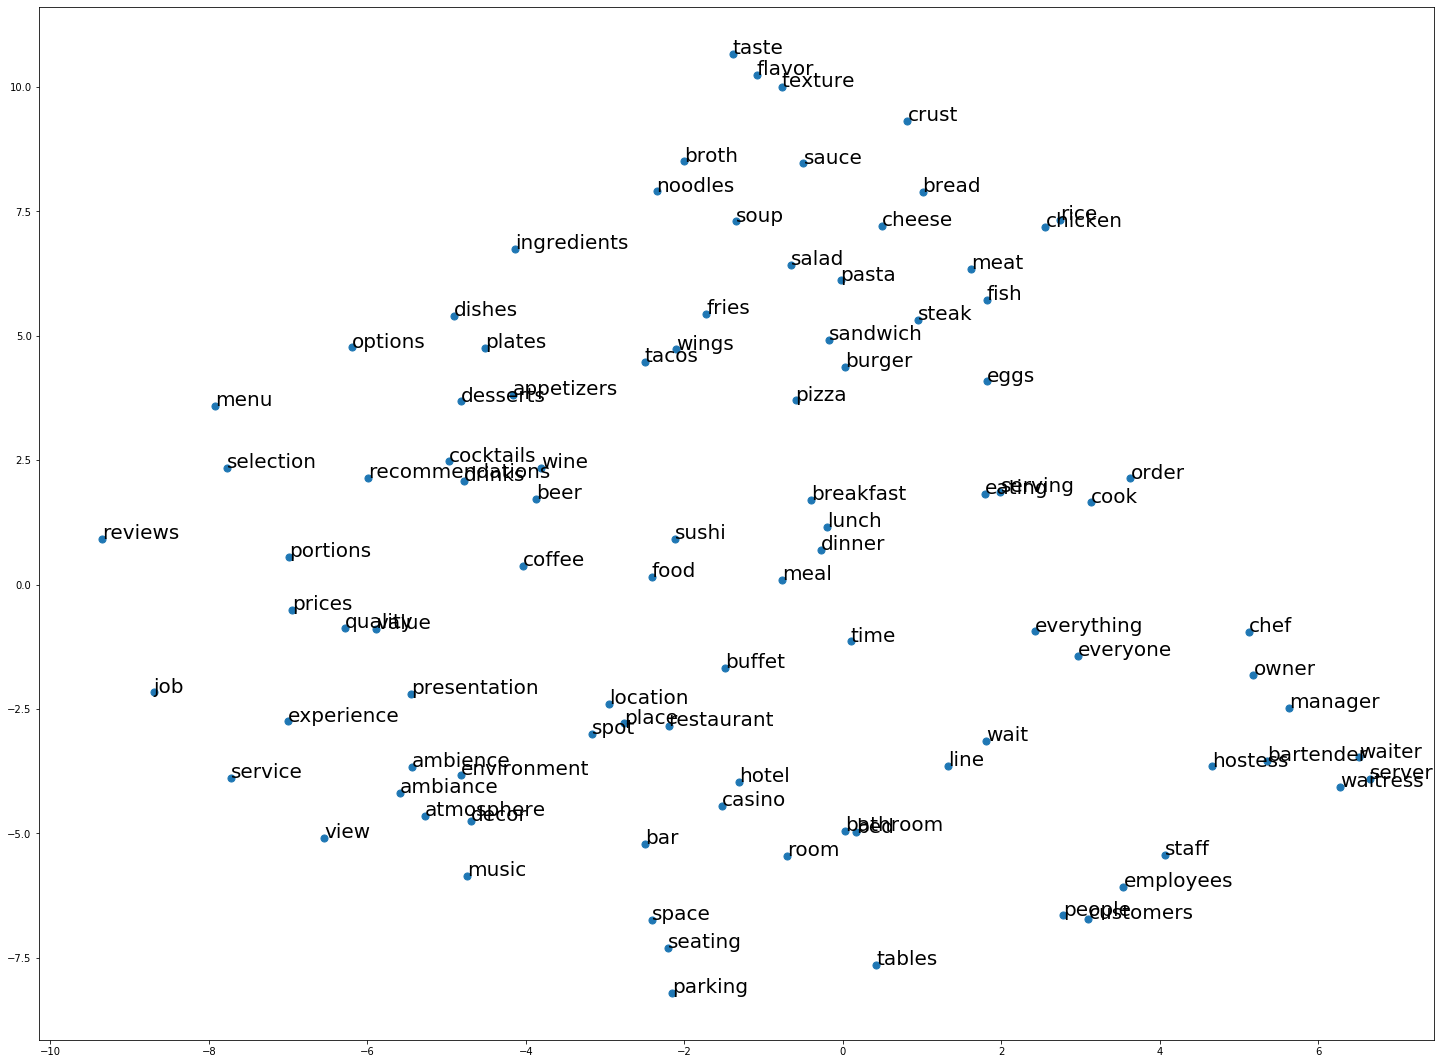

In [46]:
cluster_testing.view_words(keys, reduced_vectors)

Now we cluster and print the clusters

In [47]:
linkage = hierarchy.linkage(reduced_vectors, method = 'ward')
clusters = hierarchy.fcluster(linkage, 15, criterion = 'maxclust')

In [48]:
cluster_testing.print_clusters(keys, clusters)

Cluster 1: ['flavor' 'taste' 'texture']
Cluster 2: ['burger' 'fries' 'sandwich' 'tacos' 'wings' 'eggs']
Cluster 3: ['meat' 'steak' 'sauce' 'bread' 'chicken' 'salad' 'fish' 'broth' 'soup'
 'noodles' 'rice' 'pasta' 'cheese']
Cluster 4: ['server' 'waiter' 'waitress' 'bartender' 'manager' 'owner' 'hostess'
 'chef']
Cluster 5: ['staff' 'people' 'employees' 'customers']
Cluster 6: ['reviews']
Cluster 7: ['drinks' 'coffee' 'beer' 'cocktails' 'recommendations' 'wine']
Cluster 8: ['menu' 'dishes' 'desserts' 'appetizers' 'options' 'ingredients' 'plates']
Cluster 9: ['order' 'wait' 'cook' 'line' 'eating' 'serving']
Cluster 10: ['food' 'experience' 'meal' 'everything' 'pizza' 'dinner' 'sushi'
 'breakfast' 'time' 'lunch' 'crust' 'everyone']
Cluster 11: ['atmosphere' 'decor' 'ambiance' 'music' 'environment' 'ambience']
Cluster 12: ['service' 'prices' 'portions' 'view' 'selection' 'quality' 'presentation'
 'job' 'value']
Cluster 13: ['place' 'restaurant' 'location' 'spot']
Cluster 14: ['room' 'buffet

Now we will see which opinions stick out the most for each cluster by aggregating the counts dataframes for each word in the cluster.

In [52]:
cluster_dictionary = dict()
cluster_keys = dict()
for i in tqdm(range(max(clusters))):
    cluster = i + 1
    keys_in_clust = np.array(keys)[np.array(clusters) == cluster]
    cluster_keys[cluster] = keys_in_clust
    keys_counts = [data_browsing.get_counts_for_word(word, pairs_counts) for word in keys_in_clust]
    main_df = data_browsing.add_dfs(keys_counts)
    cluster_dictionary[cluster] = data_browsing.get_pct_change_df(main_df, baseline['opinions'], threshold = 75)

In [53]:
for i in range(1, max(clusters) + 1):
    print(f'Cluster {i}')
    print(cluster_keys[i])
    print(cluster_dictionary[i]['word'].values[:5])
    print('\n')

Cluster 1
['flavor' 'taste' 'texture']
['acquired' 'explosion of' 'bursting with' 'full of' 'rich in']


Cluster 2
['burger' 'fries' 'sandwich' 'tacos' 'wings' 'eggs']
['perfectly poached' 'poached' 'boneless' 'extra crispy' 'skinny']


Cluster 3
['meat' 'steak' 'sauce' 'bread' 'chicken' 'salad' 'fish' 'broth' 'soup'
 'noodles' 'rice' 'pasta' 'cheese']
['crusty' 'well marinated' 'not dry' 'tender' 'marinated']


Cluster 4
['server' 'waiter' 'waitress' 'bartender' 'manager' 'owner' 'hostess'
 'chef']
['nice guy' 'disappeared' 'very apologetic' 'sweetheart' 'not attentive']


Cluster 5
['staff' 'people' 'employees' 'customers']
['loyal' 'always friendly and helpful' 'always right'
 'always very friendly' 'always been friendly']


Cluster 6
['reviews']
['long overdue' 'glowing' 'negative' 'honest' 'mixed']


Cluster 7
['drinks' 'coffee' 'beer' 'cocktails' 'recommendations' 'wine']
['highly' 'illy' 'refilled' 'always refilled' 'flowing']


Cluster 8
['menu' 'dishes' 'desserts' 'appetizers'

In [54]:
pairs_counts.to_csv('pairs_counts.csv')